In [1]:
from sqlalchemy import URL, create_engine, text
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
MYSQL_DRIVER = "mysql+mysqlconnector"
MYSQL_USERNAME = "root"
MYSQL_PASSWORD = "XXXXXXXXXXX"
MYSQL_HOST_NAME = "localhost"
MYSQL_PORT = 3306
DB_NAME = "transfermarktdb"


url_object = URL.create(
    MYSQL_DRIVER,
    username=MYSQL_USERNAME,
    password=MYSQL_PASSWORD,
    host=MYSQL_HOST_NAME,
    port=MYSQL_PORT,
    database=DB_NAME,
)

engine = create_engine(url_object)

توزیع تعداد بازی های بازیکنان در یک فصل

ارتباط بین تعداد گل زده شده و قیمت تخمینی سایت برای هر بازیکن

ارتباط بین تعداد گل زده شده و قیمت تخمینی سایت برای یک مهاجم

توزیع قیمت تخمینی بازیکنان به تفکیک پست

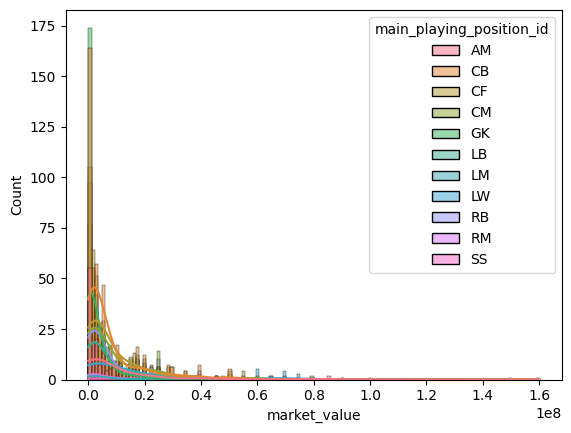

In [11]:
with engine.connect() as conn:
    resultAM = conn.execute(text("SELECT player_id, market_value, main_playing_position_id FROM player_detail INNER JOIN player ON player_detail.player_id = player.id WHERE season = 2021 AND NOT ISNULL(market_value) AND main_playing_position_id = 'AM';"))
    resultCB = conn.execute(text("SELECT player_id, market_value, main_playing_position_id FROM player_detail INNER JOIN player ON player_detail.player_id = player.id WHERE season = 2021 AND NOT ISNULL(market_value) AND main_playing_position_id = 'CB';"))
    resultCF = conn.execute(text("SELECT player_id, market_value, main_playing_position_id FROM player_detail INNER JOIN player ON player_detail.player_id = player.id WHERE season = 2021 AND NOT ISNULL(market_value) AND main_playing_position_id = 'CF';"))
    resultCM = conn.execute(text("SELECT player_id, market_value, main_playing_position_id FROM player_detail INNER JOIN player ON player_detail.player_id = player.id WHERE season = 2021 AND NOT ISNULL(market_value) AND main_playing_position_id = 'CM';"))
    resultDM = conn.execute(text("SELECT player_id, market_value, main_playing_position_id FROM player_detail INNER JOIN player ON player_detail.player_id = player.id WHERE season = 2021 AND NOT ISNULL(market_value) AND main_playing_position_id = 'DM';"))
    resultGK = conn.execute(text("SELECT player_id, market_value, main_playing_position_id FROM player_detail INNER JOIN player ON player_detail.player_id = player.id WHERE season = 2021 AND NOT ISNULL(market_value) AND main_playing_position_id = 'GK';"))
    resultLB = conn.execute(text("SELECT player_id, market_value, main_playing_position_id FROM player_detail INNER JOIN player ON player_detail.player_id = player.id WHERE season = 2021 AND NOT ISNULL(market_value) AND main_playing_position_id = 'LB';"))
    resultLM = conn.execute(text("SELECT player_id, market_value, main_playing_position_id FROM player_detail INNER JOIN player ON player_detail.player_id = player.id WHERE season = 2021 AND NOT ISNULL(market_value) AND main_playing_position_id = 'LM';"))
    resultLW = conn.execute(text("SELECT player_id, market_value, main_playing_position_id FROM player_detail INNER JOIN player ON player_detail.player_id = player.id WHERE season = 2021 AND NOT ISNULL(market_value) AND main_playing_position_id = 'LW';"))
    resultRB = conn.execute(text("SELECT player_id, market_value, main_playing_position_id FROM player_detail INNER JOIN player ON player_detail.player_id = player.id WHERE season = 2021 AND NOT ISNULL(market_value) AND main_playing_position_id = 'RB';"))
    resultRM = conn.execute(text("SELECT player_id, market_value, main_playing_position_id FROM player_detail INNER JOIN player ON player_detail.player_id = player.id WHERE season = 2021 AND NOT ISNULL(market_value) AND main_playing_position_id = 'RM';"))
    resultRW = conn.execute(text("SELECT player_id, market_value, main_playing_position_id FROM player_detail INNER JOIN player ON player_detail.player_id = player.id WHERE season = 2021 AND NOT ISNULL(market_value) AND main_playing_position_id = 'RW';"))
    resultSS = conn.execute(text("SELECT player_id, market_value, main_playing_position_id FROM player_detail INNER JOIN player ON player_detail.player_id = player.id WHERE season = 2021 AND NOT ISNULL(market_value) AND main_playing_position_id = 'SS';"))

AM_mv = pd.DataFrame(resultAM.all())
CB_mv = pd.DataFrame(resultCB.all())
CF_mv = pd.DataFrame(resultCF.all())
CM_mv = pd.DataFrame(resultCM.all())
DM_mv = pd.DataFrame(resultCB.all())
GK_mv = pd.DataFrame(resultGK.all())
LB_mv = pd.DataFrame(resultLB.all())
LM_mv = pd.DataFrame(resultLM.all())
LW_mv = pd.DataFrame(resultLW.all())
RB_mv = pd.DataFrame(resultRB.all())
RM_mv = pd.DataFrame(resultRM.all())
SS_mv = pd.DataFrame(resultSS.all())



df = pd.concat(axis=0, ignore_index=True, objs=[AM_mv, CB_mv, CF_mv, CM_mv, DM_mv, GK_mv, LB_mv, LM_mv, LW_mv, RB_mv, RM_mv, SS_mv])


fig, ax = plt.subplots()
sns.histplot(data=df, x="market_value", hue="main_playing_position_id", ax=ax, kde=True);


Number of Goals per League
** season 2021

In [55]:
with engine.connect() as conn:
    result = conn.execute(text('SELECT league_id, SUM(goal_for) AS goals FROM team_detail WHERE year = 2021 GROUP BY league_id ORDER BY goals DESC;'))

goals_2021 = pd.DataFrame(result.all())
goals_2021

,league_id,goals
0,IT1,1089
1,GB1,1071
2,FR1,1067
3,L1,954
4,ES1,951


Teams Total Market Value 2017-2021

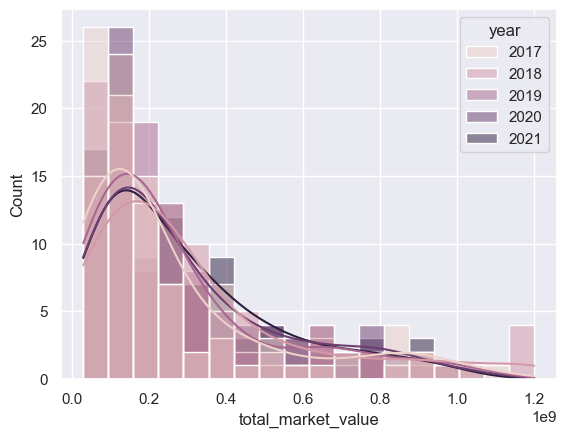

In [44]:
with engine.connect() as conn:
    result2017 = conn.execute(text(f"SELECT year, team.name, total_market_value FROM team_detail INNER JOIN team ON team_detail.team_id = team.id WHERE year=2017 ORDER BY total_market_value DESC;"))
    result2018 = conn.execute(text(f"SELECT year, team.name, total_market_value FROM team_detail INNER JOIN team ON team_detail.team_id = team.id WHERE year=2018 ORDER BY total_market_value DESC;"))
    result2019 = conn.execute(text(f"SELECT year, team.name, total_market_value FROM team_detail INNER JOIN team ON team_detail.team_id = team.id WHERE year=2019 ORDER BY total_market_value DESC;"))
    result2020 = conn.execute(text(f"SELECT year, team.name, total_market_value FROM team_detail INNER JOIN team ON team_detail.team_id = team.id WHERE year=2020 ORDER BY total_market_value DESC;"))
    result2021 = conn.execute(text(f"SELECT year, team.name, total_market_value FROM team_detail INNER JOIN team ON team_detail.team_id = team.id WHERE year=2021 ORDER BY total_market_value DESC;"))
team_tmv_2017 = pd.DataFrame(result2017.all())
team_tmv_2018 = pd.DataFrame(result2018.all())
team_tmv_2019 = pd.DataFrame(result2019.all())
team_tmv_2020 = pd.DataFrame(result2020.all())
team_tmv_2021 = pd.DataFrame(result2021.all())


df = pd.concat(axis=0, ignore_index=True, objs=[team_tmv_2017, team_tmv_2018, team_tmv_2019, team_tmv_2020, team_tmv_2021])


fig, ax = plt.subplots()
sns.histplot(
    data=df, x="total_market_value", hue='year', ax=ax, kde=True
);
